In [ ]:
#This data set include 1797 array images.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()
df = pd.DataFrame(digits.data)

In [3]:
df['label'] = digits.target
print(df.head())

     0    1    2     3     4     5    6    7    8    9  ...   55   56   57  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  0.0  0.0  0.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

    58    59    60    61   62   63  label  
0  6.0  13.0  10.0   0.0  0.0  0.0      0  
1  0.0  11.0  16.0  10.0  0.0  0.0      1  
2  0.0   3.0  11.0  16.0  9.0  0.0      2  
3  7.0  13.0  13.0   9.0  0.0  0.0      3  
4  0.0   2.0  16.0   4.0  0.0  0.0      4  

[5 rows x 65 columns]


In [4]:
df['label'].value_counts()

label
3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: count, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1797 non-null   float64
 1   1       1797 non-null   float64
 2   2       1797 non-null   float64
 3   3       1797 non-null   float64
 4   4       1797 non-null   float64
 5   5       1797 non-null   float64
 6   6       1797 non-null   float64
 7   7       1797 non-null   float64
 8   8       1797 non-null   float64
 9   9       1797 non-null   float64
 10  10      1797 non-null   float64
 11  11      1797 non-null   float64
 12  12      1797 non-null   float64
 13  13      1797 non-null   float64
 14  14      1797 non-null   float64
 15  15      1797 non-null   float64
 16  16      1797 non-null   float64
 17  17      1797 non-null   float64
 18  18      1797 non-null   float64
 19  19      1797 non-null   float64
 20  20      1797 non-null   float64
 21  21      1797 non-null   float64
 22  

In [6]:
x= digits.data
y= digits.target
print("X Shape", x.shape)
print("y Shape", y.shape)

X Shape (1797, 64)
y Shape (1797,)


In [7]:
print("Unique labels",np.unique(y))

Unique labels [0 1 2 3 4 5 6 7 8 9]


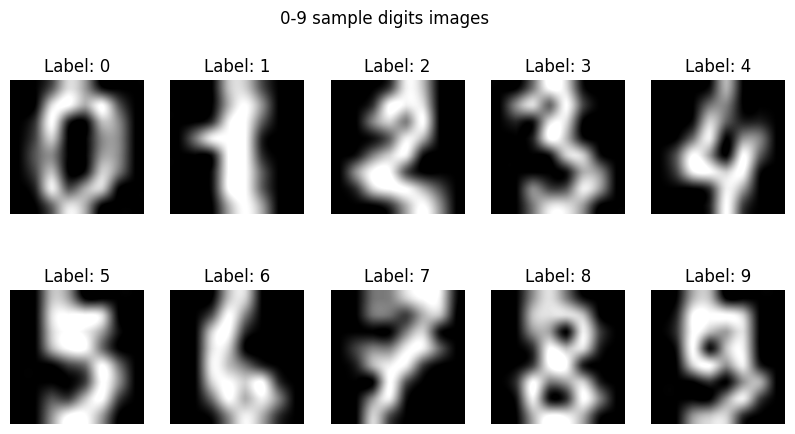

In [8]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for ax, image, label in zip(axes.ravel(), digits.images, digits.target):
    ax.imshow(image, cmap='gray', interpolation='spline16')
    ax.set_title(f"Label: {label}")
    ax.axis('off')
plt.suptitle("0-9 sample digits images")
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train , x_test , y_train , y_test = train_test_split(x ,y , test_size=0.3, random_state = 42)
x_train.shape[0]

1257

In [11]:
x_test.shape[0]

540

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [13]:
svm_pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('svc' , SVC(probability=True, random_state=42))
])

knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])


In [14]:
svm_pipeline.fit(x_train , y_train)
knn_pipeline.fit(x_train , y_train)

,steps,"[('scaler', ...), ('knn', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30


In [15]:
y_pred_svm = svm_pipeline.predict(x_test)
y_pred_knn = knn_pipeline.predict(x_test)

In [16]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [17]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"SVM accuracy: {accuracy_svm:}")
print(f"KNN accuracy: {accuracy_knn:}")

SVM accuracy: 0.9796296296296296
KNN accuracy: 0.975925925925926


In [18]:
print("\nSVM classification report:\n", classification_report(y_test, y_pred_svm))
print("\nKNN classification report:\n", classification_report(y_test, y_pred_knn))


SVM classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        50
           2       0.94      1.00      0.97        47
           3       0.98      0.94      0.96        54
           4       0.98      1.00      0.99        60
           5       0.97      1.00      0.99        66
           6       0.98      1.00      0.99        53
           7       1.00      0.96      0.98        55
           8       0.95      0.95      0.95        43
           9       0.98      0.93      0.96        59

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540


KNN classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.98      1.00      0.99        50
           2       0

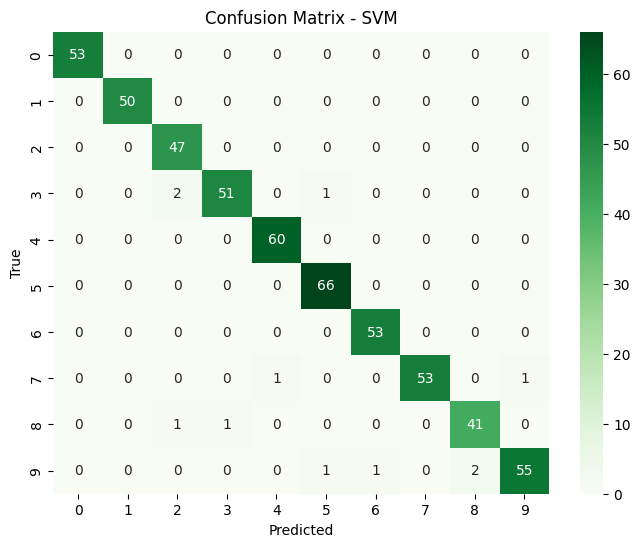

In [19]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8,6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - SVM')
plt.show()

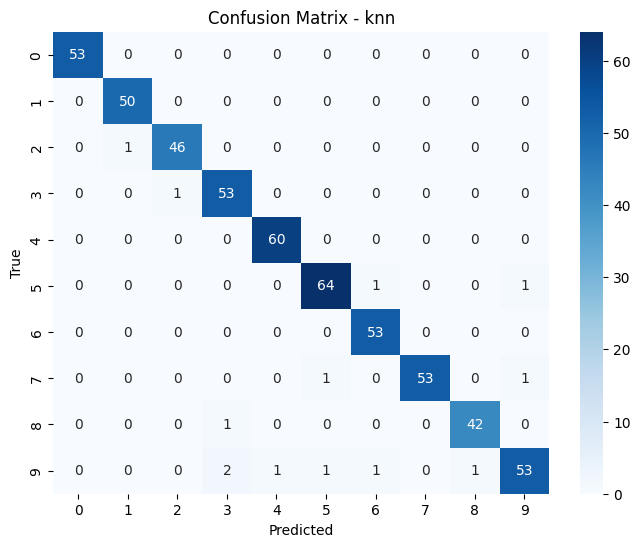

In [29]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8,6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - knn')
plt.show()

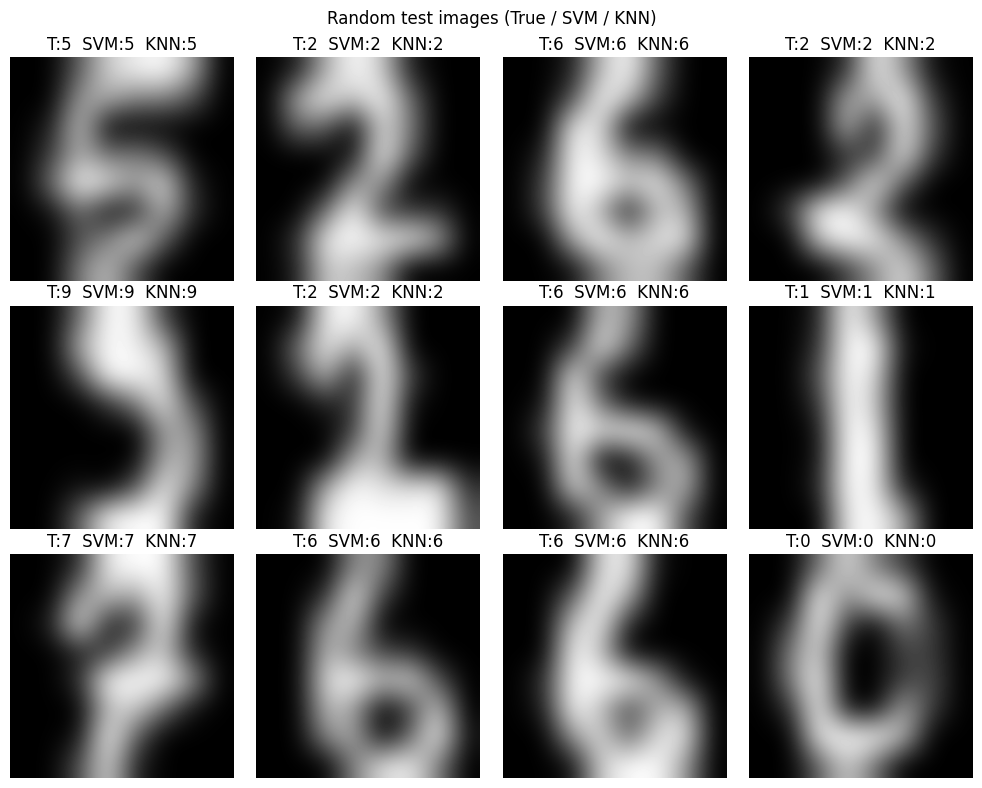

In [20]:
n_show = 12
indices = np.random.choice(len(x_test), n_show, replace=False)
fig, axes = plt.subplots(3, 4, figsize=(10, 8))

for ax, idx in zip(axes.ravel(), indices):
    img = x_test[idx].reshape(8, 8)            # reshape from 64 to 8x8
    true = y_test[idx]
    pred_svm = svm_pipeline.predict(x_test[idx].reshape(1, -1))[0]
    pred_knn = knn_pipeline.predict(x_test[idx].reshape(1, -1))[0]
    ax.imshow(img, cmap='gray', interpolation='bicubic')
    ax.set_title(f"T:{true}  SVM:{pred_svm}  KNN:{pred_knn}")
    ax.axis('off')

plt.suptitle("Random test images (True / SVM / KNN)")
plt.tight_layout()
plt.show()

In [21]:
import joblib

if accuracy_svm >= accuracy_knn:
    best_model = svm_pipeline
    best_name = "svm"
else:
    best_model = knn_pipeline
    best_name = "knn"

filename = f"digits_best_{best_name}_pipeline.joblib"
joblib.dump(best_model, filename)
print("Saved best model as:", filename)

Saved best model as: digits_best_svm_pipeline.joblib
